In [39]:
!jt -monokai

In [51]:
import pandas as pd
from bs4 import BeautifulSoup #as bs
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['dark_background'])
import numpy as np
from scipy.stats import norm
import statistics

In [2]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'

In [3]:
driver = webdriver.Chrome(PATH)
driver.get('https://www.edmunds.com/inventory/srp.html?inventorytype=used%2Ccpo&make=dodge&model=journey&year=2010&initialUrlPattern=make%2Fmodel%2Fyear')
# driver.get(page)
print(driver.title)

C:\Users\DTZT0\AppData\Local\Temp/ipykernel_24344/1436945521.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


Used 2010 Dodge Journey for Sale Near Altoona, PA - Special Offers | Edmunds


In [4]:
def get_page(make, model, year, page):
#     url= f'https://condos.ca/{city}/condos-for-{mode}?mode={mode}&page={page}'
    url = f'https://www.edmunds.com/inventory/srp.html?inventorytype=used%2Ccpo&make={make}&model={model}&year={year}-2010&initialUrlPattern=make%2Fmodel%2Fyear&pagenumber={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

In [5]:
soup = get_page('dodge', 'journey', 2010, 1)

In [6]:
soup.find('li', 'd-flex mb-0_75 mb-md-1_5 col-12 col-md-6').get_text()

'Go to 1 photoGo to 2 photoGo to 3 photoGo to 4 photoGo to 5 photoGo to 6 photoGo to 7 photo2010 Dodge JourneySXT 4dr SUV$5,995great price$2,663 Below Market134,000 milesNo accidents, 1 Owner, Personal use only6cyl AutomaticKennon Auto Sales (221 mi away)Back-up cameraBluetoothHeated seatsPower Driver SeatTire Pressure Warnin...+moreLocated in Concord, VA / 221 miles away from Altoona, PANew dealer tradeAutoCheck Vehicle History SummaryAccident Free Vehicle: YesPersonal Use Only: YesHistory Provider: AutoCheckTitle Details: Clean TitleSalvage Vehicle: NoFrame Damage: NoTheft History: NoLemon Status: NoFree History Report: NoFeatures and Specs:19 Combined MPG (16 City/24 Highway)Listing Information:VIN: 3D4PG5FV1AT109231 Stock: K4021 Certified Pre-Owned: No '

In [7]:
soup.find('div', 'size-16 font-weight-bold mb-0_5 text-primary-darker').get_text()

'2010 Dodge Journey'

In [120]:
regex = re.compile("^2010\\ Dodge\\ Journey$")
testString = "2010 Dodge Journey" # fill this in
matchArray = regex.findall(testString)
matchArray
# the matchArray variable contains the list of matches

['2010 Dodge Journey']

In [8]:
Listing=[]
regex = re.compile("^2010\\ Dodge\\ Journey$")

for tag in soup.find_all('div', 'size-16 font-weight-bold mb-0_5 text-primary-darker'):
#     for tag in tag = regex:
        Listing.append(tag.get_text())
Listing[:10]

['2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey',
 '2010 Dodge Journey']

In [9]:
submodel = []
for tag in soup.find_all('div', 'font-weight-normal size-14 text-gray-dark'):
    submodel.append(tag.get_text())
    
submodel[:10]

['SXT 4dr SUV',
 'SXT 4dr SUV',
 'R/T 4dr SUV',
 'SXT 4dr SUV',
 'SXT 4dr SUV',
 'SXT 4dr SUV',
 'R/T 4dr SUV',
 'R/T 4dr SUV',
 'SXT 4dr SUV',
 'SXT 4dr SUV']

In [123]:
regex = re.compile(r"(\d{1,2}.\d{3})")
testString = '$5,495great price$3,142 Below Market Not Priced $6,999fair price$213 Above Market $13,995great price$2,069 Below Market $13,990'
matchArray = regex.findall(testString)
matchArray

['5,495', '3,142', '6,999', '13,995', '2,069', '13,990']

In [66]:
matchArray[0]

'5,495'

In [11]:
#Works but crude. Run cell below instead.
price = []
for tag in soup.find_all('div', 'pricing-details d-flex flex-column'):
#     if str(cars['Price']) == re.compile(r"(\d{1,2}.\d{3})"):
        price.append(tag.get_text())
# print(len(price))
price[:10]

['$5,995great price$2,845 Below Market',
 '$7,707good price$2,785 Below Market',
 '$4,500great price$1,582 Below Market',
 '$4,995great price$3,039 Below Market',
 '$4,999great price$3,274 Below Market',
 '$6,455good price$2,139 Below Market',
 '$3,379great price$1,435 Below Market',
 '$5,995good price$1,819 Below Market',
 '$5,995fair price$1,430 Below Market',
 '$7,995fair price$617 Below Market']

In [11]:
price = []
for tag in soup.find_all('span', 'size-24 font-weight-bold text-gray-darker'):
#     if str(cars['Price']) == re.compile(r"(\d{1,2}.\d{3})"):
        price.append(tag.get_text())
# print(len(price))
price[:25]

['$5,995',
 '$7,707',
 '$7,457',
 '$4,500',
 '$4,995',
 '$6,455',
 '$4,999',
 '$5,495',
 '$5,995',
 '$4,995',
 '$5,995',
 '$6,980',
 '$5,900',
 '$5,995',
 '$4,999',
 '$8,900',
 '$6,500',
 '$6,595',
 '$6,999',
 '$6,995',
 '$7,995']

In [12]:
Mileage = []

for t1 in soup.find_all('div','key-point size-14 d-flex align-items-baseline mt-0_5 col-12'):
    t1.string
    for tag in t1.find_all(text=re.compile("(\d{1,3}.\d{3}\smiles)"), limit=1):
        Mileage.append(tag.get_text())
print(len(Mileage))        
    
Mileage[:15]

21


['134,000 miles',
 '81,584 miles',
 '133,453 miles',
 '192,494 miles',
 '129,303 miles',
 '142,721 miles',
 '158,945 miles',
 '142,430 miles',
 '128,947 miles',
 '160,220 miles',
 '140,248 miles',
 '131,561 miles',
 '152,957 miles',
 '116,603 miles',
 '191,082 miles']

In [13]:
print(f'Num. Listings: {len(Listing)}')
print(f'Num. Submodels: {len(submodel)}')
print(f'Num. Price tags: {len(price)}')

Num. Listings: 21
Num. Submodels: 21
Num. Price tags: 21


In [14]:
listing_container = soup.find_all('li', 'd-flex mb-0_75 mb-md-1_5 col-12 col-md-6')

In [15]:
len(listing_container)

21

In [42]:
data = {'Listing':[],
'Price':[],
'Submodel':[],
'Mileage': []
# 'Date_listed':[],
}
final_list=[]
for page in range(3):
    soup = get_page('dodge', 'journey', 2010, page) #should page be expressed explicitly or derivitively
    condo_container = soup.find_all('li', 'd-flex mb-0_75 mb-md-1_5 col-12 col-md-6')
#     time.sleep(random())
    print(f'Page number: {page+1}')
    for i in range(len(condo_container)):
        Listing = []
        price_tag = condo_container[i].find('span', 'size-24 font-weight-bold text-gray-darker')
        data['Price'].append(price_tag.get_text())
        list_tag = condo_container[i].find('div', 'size-16 font-weight-bold mb-0_5 text-primary-darker')
        data['Listing'].append(list_tag.get_text())
        submodel_tag = condo_container[i].find('div', 'font-weight-normal size-14 text-gray-dark')
        data['Submodel'].append(submodel_tag.get_text())
        mileage_tag = condo_container[i].find('div','key-point size-14 d-flex align-items-baseline mt-0_5 col-12')
        mileage_tag.string
#         mileage_tag = ''.join(str(x) for x in mileage_tag)
        for tag in mileage_tag.find_all(text=re.compile("(\d{1,3}.\d{3})"), limit=1):
            data['Mileage'].append(tag.get_text())

# if maint_tag != '':
#     Maintenance_Fees = int(maint_tag.split('$')[1].replace(',',''))
#     data['Maint_Fees'].append(Maintenance_Fees)
# else:
#     data['Maint_Fees'].append('error')
#     for info_tag in condo_container[i].find('div',class_='styles___MaintHolder-sc-54qk44-10 BqHBp'):
#         listing.append(info_tag)
    final_list.append(Listing)

Page number: 1
Page number: 2
Page number: 3


In [43]:
data

{'Listing': ['2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '2010 Dodge Journey',
  '20

In [44]:
cars = pd.DataFrame(data)
cars

,Listing,Price,Submodel,Mileage
0,2010 Dodge Journey,"$5,995",SXT 4dr SUV,"134,000 miles"
1,2010 Dodge Journey,"$7,707",SXT 4dr SUV,"81,584 miles"
2,2010 Dodge Journey,"$7,457",R/T 4dr SUV,"133,453 miles"
3,2010 Dodge Journey,"$4,500",SXT 4dr SUV,"192,494 miles"
4,2010 Dodge Journey,"$4,995",SXT 4dr SUV,"129,303 miles"
5,2010 Dodge Journey,"$6,455",SXT 4dr SUV,"142,721 miles"
6,2010 Dodge Journey,"$4,999",R/T 4dr SUV,"158,945 miles"
7,2010 Dodge Journey,"$5,495",R/T 4dr SUV,"142,430 miles"
8,2010 Dodge Journey,"$5,995",SXT 4dr SUV,"128,947 miles"
9,2010 Dodge Journey,"$4,995",SXT 4dr SUV,"160,220 miles"


In [38]:
cars.dtypes

Listing     object
Price       object
Submodel    object
Mileage     object
dtype: object

In [45]:
cars['Listing'] = cars['Listing'].astype('string')
# cars['Price'] = cars['Price'].astype('string')
cars['Submodel'] = cars['Submodel'].astype('string')
# cars['Price'] = cars['Price'].str[:7]
cars['Submodel'] = cars['Submodel'].str[:3]
cars['Mileage'] = cars['Mileage'].str[:-5]

In [21]:
cars

,Listing,Price,Submodel,Mileage
0,2010 Dodge Journey,"$5,995",SXT,"134,000"
1,2010 Dodge Journey,"$7,707",SXT,"81,584"
2,2010 Dodge Journey,"$7,457",R/T,"133,453"
3,2010 Dodge Journey,"$4,500",SXT,"192,494"
4,2010 Dodge Journey,"$4,995",SXT,"129,303"
5,2010 Dodge Journey,"$6,455",SXT,"142,721"
6,2010 Dodge Journey,"$4,999",R/T,"158,945"
7,2010 Dodge Journey,"$5,495",R/T,"142,430"
8,2010 Dodge Journey,"$5,995",SXT,"128,947"
9,2010 Dodge Journey,"$4,995",SXT,"160,220"


In [46]:
def stripDollar(symb):
    return symb.strip("$")

def stripComma(symb):
    rep = symb.replace(',','')
    return rep

# def stripLastChar1(symb):
#     return symb.strip('g')

# def stripLastChar2(symb):
#     return symb.strip('f')

cars['Price'] = cars['Price'].apply(lambda x: f"{stripComma(x)}")
cars['Price'] = cars['Price'].apply(lambda x: f"{stripDollar(x)}")
cars['Mileage'] = cars['Mileage'].apply(lambda x: f"{stripComma(x)}")
# cars['Price'] = cars['Price'].apply(lambda x: f"{stripLastChar1(x)}")
# cars['Price'] = cars['Price'].apply(lambda x: f"{stripLastChar2(x)}")

cars['Price'] = pd.to_numeric(cars['Price'])
cars['Mileage'] = pd.to_numeric(cars['Mileage'])

cars

,Listing,Price,Submodel,Mileage
0,2010 Dodge Journey,5995,SXT,134000
1,2010 Dodge Journey,7707,SXT,81584
2,2010 Dodge Journey,7457,R/T,133453
3,2010 Dodge Journey,4500,SXT,192494
4,2010 Dodge Journey,4995,SXT,129303
5,2010 Dodge Journey,6455,SXT,142721
6,2010 Dodge Journey,4999,R/T,158945
7,2010 Dodge Journey,5495,R/T,142430
8,2010 Dodge Journey,5995,SXT,128947
9,2010 Dodge Journey,4995,SXT,160220


In [23]:
cars.dtypes

Listing     string
Price        int64
Submodel    string
Mileage      int64
dtype: object

In [47]:
cars.sort_values('Mileage', ascending=True)

,Listing,Price,Submodel,Mileage
29,2010 Dodge Journey,8995,SE,41344
15,2010 Dodge Journey,8900,R/T,53555
24,2010 Dodge Journey,9999,R/T,69343
28,2010 Dodge Journey,9595,SE,77318
36,2010 Dodge Journey,8999,SXT,79673
1,2010 Dodge Journey,7707,SXT,81584
39,2010 Dodge Journey,6995,SE,83860
34,2010 Dodge Journey,9900,R/T,90056
20,2010 Dodge Journey,7995,SXT,104708
37,2010 Dodge Journey,11900,SXT,109242


In [48]:
cars.describe()

,Price,Mileage
count,42.000000,42.000000
mean,7052.428571,130473.666667
std,2019.825109,37327.626283
min,2950.000000,41344.000000
25%,5712.500000,116393.750000
50%,6987.500000,133726.500000
75%,8373.000000,152239.000000
max,12795.000000,202370.000000


In [33]:
cars.to_csv('cars.csv')

## Plots:

C:\ProgramData\Anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


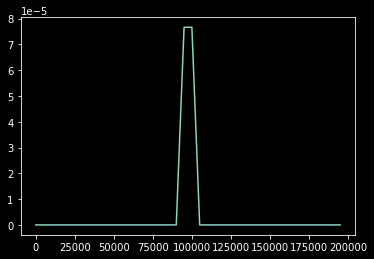

In [53]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(0, 200000, 5000)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'flat'

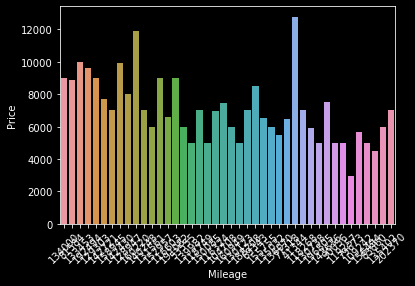

In [54]:
g = sns.barplot(x="Mileage", y='Price', data=cars)
g.set_xticklabels(cars.Mileage,rotation=45)
# plt.xticks(bar, labels, rotation='vertical')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

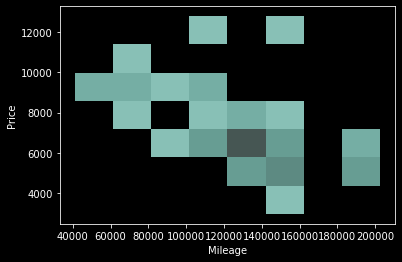

In [103]:
c = sns.histplot(x='Mileage', y='Price', data=cars)
c.set_xlabel(cars['Mileage'])
c.set_ylabel(cars['Price'])
# plt.xticks(x, rotation='vertical')

No handles with labels found to put in legend.


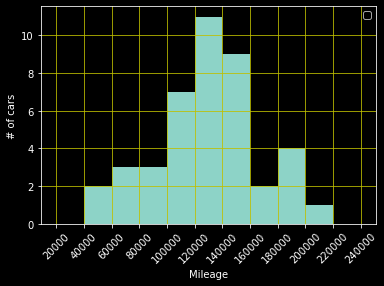

In [108]:
# bins = [25000,50000,75000,100000,125000,150000,175000,200000,225000,250000]
# bins = [20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,
#         140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000]
bins = [20000,40000,60000,80000,100000,120000,
        140000,160000,180000,200000,220000,240000]

ax = plt.hist(cars['Mileage'], bins=bins)
plt.xticks(bins, rotation=45)
# plt.ylabel('# of cars', rotation = 30)
plt.ylabel('# of cars')
plt.xlabel('Mileage')

plt.grid(c='y')
plt.legend()
plt.show()

C:\Users\DTZT0\AppData\Local\Temp/ipykernel_24344/4006355997.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cars['Mileage'], rotation=60)


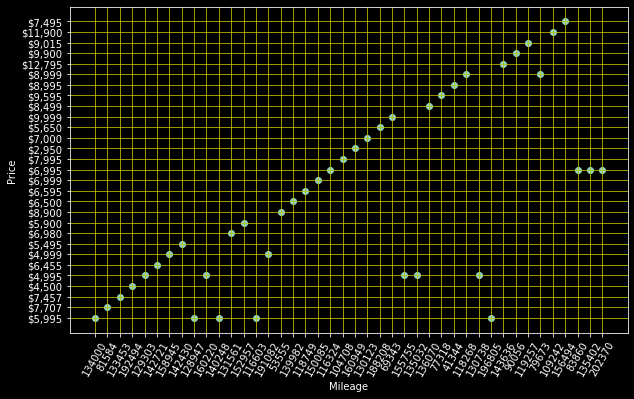

In [101]:
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter('Mileage', 'Price',data=data)
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
# miles = [25000,50000,75000,100000,125000,150000,175000,200000]
ax.set_xticklabels(cars['Mileage'], rotation=60)
# plt.grid(linestyle='.')
plt.grid(color='y')
plt.set_cmap('YlGnBu');

In [102]:
len(cars['Mileage'])

42

C:\Users\DTZT0\AppData\Local\Temp/ipykernel_66476/2420684815.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cars['Mileage'], rotation=45)


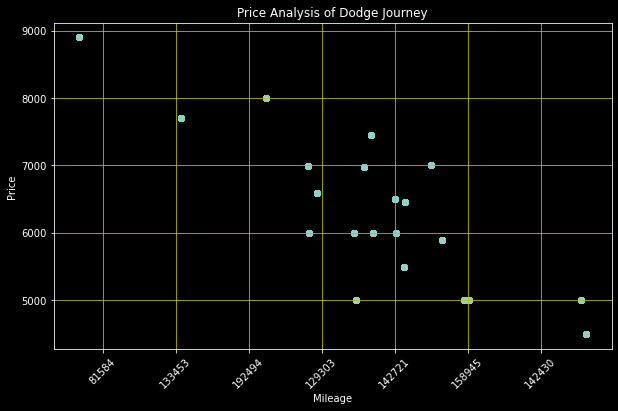

In [137]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
ax.scatter(cars['Mileage'], 
           cars['Price'],
          cmap='YlGnBu')

ax.set(title = "Price Analysis of Dodge Journey",
       xlabel = "Mileage",
       ylabel = "Price")

ax.set_xticklabels(cars['Mileage'], rotation=45)
plt.grid(color='y', linestyle='-')
plt.show();

### Code sample project is based off:

In [2]:
from bs4 import BeautifulSoup # For HTML parsing
from time import sleep # To prevent overwhelming the server between connections
import pandas as pd # For converting results to a dataframe and bar chart plots
# For Visualizations
# import matplotlib.pyplot as plt
# import plotly.offline as py
# import plotly.graph_objs as go
# %matplotlib inline

In [155]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome(PATH)
driver.get('https://condos.ca')
# driver.quit()

C:\Users\DTZT0\AppData\Local\Temp/ipykernel_68032/3717584681.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [176]:
!pip show selenium

Name: selenium
Version: 4.1.5
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: urllib3, trio-websocket, trio
Required-by: 


In [91]:
two_bed = driver.find_element_by_css_selector('styles___AskingPrice-sc-54qk44-4 deOfjO')
two_bed.click()

C:\Users\DTZT0\AppData\Local\Temp/ipykernel_68032/176391171.py:1: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  two_bed = driver.find_element_by_css_selector('styles___AskingPrice-sc-54qk44-4 deOfjO')


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"styles___AskingPrice-sc-54qk44-4 deOfjO"}
  (Session info: chrome=105.0.5195.127)
Stacktrace:
Backtrace:
	Ordinal0 [0x0075DF13+2219795]
	Ordinal0 [0x006F2841+1779777]
	Ordinal0 [0x0060423D+803389]
	Ordinal0 [0x00633025+995365]
	Ordinal0 [0x006331EB+995819]
	Ordinal0 [0x00660F52+1183570]
	Ordinal0 [0x0064E844+1108036]
	Ordinal0 [0x0065F192+1175954]
	Ordinal0 [0x0064E616+1107478]
	Ordinal0 [0x00627F89+950153]
	Ordinal0 [0x00628F56+954198]
	GetHandleVerifier [0x00A52CB2+3040210]
	GetHandleVerifier [0x00A42BB4+2974420]
	GetHandleVerifier [0x007F6A0A+565546]
	GetHandleVerifier [0x007F5680+560544]
	Ordinal0 [0x006F9A5C+1808988]
	Ordinal0 [0x006FE3A8+1827752]
	Ordinal0 [0x006FE495+1827989]
	Ordinal0 [0x007080A4+1867940]
	(No symbol) [0x76EDFA29]
	RtlGetAppContainerNamedObjectPath [0x77177A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77177A6E+238]


In [ ]:
Gym = driver.find_element_by_css_selector('insert_css_path')
Gym.click()

In [156]:
def get_page(city, mode, page):
    url= f'https://condos.ca/{city}/condos-for-{mode}?mode={mode}&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

In [157]:
#Defining soup object for page 1
soup = get_page('toronto', 'Sale',1)

In [158]:
#The total number of Condo Listings in Toronto
soup.find('div', class_ = 'sc-dkzDqf haGQhO styles___ListingPreview-sc-1c409cv-0 ciGkUB').get_text() 
#no. of listings : 3560

'1/6Just listed$575,00017 minutes1505 - 1461 Lawrence Ave W2BD2BA1 Parking700-799 sqftMLS#: W5771762Brokerage: WELCOME HOME REALTY INC., BROKERAGECompare17 minutes'

In [159]:
len(soup.find_all('div', class_ = 'styles___AskingPrice-sc-54qk44-4 deOfjO')) 
#43

40

In [160]:
prices=[]
for tag in soup.find_all('div', class_ = 'styles___AskingPrice-sc-54qk44-4 deOfjO'):
    prices.append(tag.get_text())
    prices[:5]

In [161]:
prices[:25]

['$575,000',
 '$699,900',
 '$999,900',
 '$788,888',
 '$855,800',
 '$1,980,000',
 '$1,150,000',
 '$699,000',
 '$699,999',
 '$748,800',
 '$599,000',
 '$599,000',
 '$699,900',
 '$1,099,000',
 '$579,900',
 '$589,000',
 '$728,800',
 '$895,000',
 '$548,000',
 '$650,000',
 '$459,900',
 '$2,300',
 '$1,895,000',
 '$789,900',
 '$749,000']

In [162]:
len(prices)

40

In [163]:
condo_container = soup.find_all('div',"styles___PreviewContent-sc-54qk44-3")

In [164]:
condo_container

[<div class="styles___PreviewContent-sc-54qk44-3 kGcPgm"><div class="styles___Flex-sc-1lfxfux-0 kbcwIq"><div class="styles___AskingPrice-sc-54qk44-4 deOfjO">$575,000</div><div class="styles___ListedDays-sc-54qk44-6 dUuebT">17 minutes</div></div><div><div><address class="styles___Address-sc-54qk44-13 kJLXXT">1505 - 1461 Lawrence Ave W</address></div></div><div class="styles___InfoHolder-sc-54qk44-7 buduQR">2BD<span role="separator"></span>2<!-- -->BA<span role="separator"></span>1<!-- --> Parking<div class="styles___Size-sc-54qk44-8 gRXgIn"><span></span>700-799 sqft</div></div><div class="styles___MaintHolder-sc-54qk44-10 BqHBp"><div class="styles___Mls-sc-54qk44-12 dceBdM">MLS#: <!-- -->W5771762</div></div><div class="styles___Brokerage-sc-54qk44-11 lciKlW">Brokerage: <!-- -->WELCOME HOME REALTY INC., BROKERAGE</div></div>,
 <div class="styles___PreviewContent-sc-54qk44-3 kGcPgm"><div class="styles___Flex-sc-1lfxfux-0 kbcwIq"><div class="styles___AskingPrice-sc-54qk44-4 deOfjO">$699,90

In [165]:
len(condo_container)

40

In [166]:
#Obtaining Location of all listings on page 1
Location_list=[]
for i in range(len(condo_container)):
    for tag in condo_container[i].find('address'):
        Location_list.append(tag)
        Location_list[:5]


In [125]:
Location_list

['811 - 25 Four Winds Dr',
 '1505 - 1461 Lawrence Ave W',
 '604 - 1461 Lawrence Ave W',
 '513 - 3237 Bayview Ave',
 'TH15 - 70 Orchid Place Dr',
 '511 - 11 Superior Ave',
 '211 - 85 Emmett Ave',
 '401 - 8 Gladstone Ave',
 '4403 - 42 Charles St E',
 '608 - 250 Manitoba Street',
 '1804 - 1900 Lake Shore Blvd W',
 '1515 - 475 The West Mall Rd',
 '3706 - 20 Shore Breeze Dr',
 '406 - 75 Portland St',
 '503 - 220 George St',
 '3207 - 36 Park Lawn Rd',
 '502 - 5 Massey Sq',
 '409 - 120 Varna Dr',
 '406 - 2181 Yonge St',
 '2006 - 10 Navy Wharf Crt',
 '1709 - 812 Burnhamthorpe Rd W',
 '209 - 10 Markbrook Lane',
 '1903 - 1166 Bay St',
 '106 - 40 Carnation Ave',
 '1715 - 181 Village Green Sq',
 '2306 - 1001 Bay St',
 '2315 - 4968 Yonge St',
 '8 Hollyhock Crt',
 '1002 - 240 Scarlett Rd',
 '1001 - 270 Palmdale Dr',
 '619 - 119 Merton St',
 '1807 - 2000 Islington Ave',
 '3501 - 36 Park Lawn Rd',
 '904 - 40 Panorama Crt',
 'PH3 - 109 Wolseley St',
 '2202 - 65 Harbour Sq',
 '429 - 255 The Donway West'

In [167]:
len(Location_list)

40

In [ ]:
data = {'Prices':[],
'Location':[],
# 'Date_listed':[],
# 'Bedrooms':[],
# 'Bathrooms':[],
# 'Maint_Fees':[],
# 'Size':[],
# 'Parking':[]
}
final_list=[]
for page in range(3):
    soup = get_page('toronto', 'Sale',page)
    condo_container = soup.find_all('div','styles___PreviewContent-sc-54qk44-3 kGcPgm')
#     time.sleep(random())
    print(f'Page number: {page}')
    for i in range(len(condo_container)):
        listing = []
        price_tag = condo_container[i].find('div',class_= 'styles___AskingPrice-sc-54qk44-4 deOfjO').get_text()
        formatted_tag = int(price_tag.split('$')[1].replace(',',''))
        data['Prices'].append(formatted_tag) 
        location_tag = condo_container[i].find('address').get_text()
        data['Location'].append(location_tag)
        data['Location'] = data['Location'].astype('string')
#         bedroom_tag = condo_container[i].find('div', 'styles___InfoHolder-sc-54qk44-7 buduQR').get_text()
#         data['Bedrooms'].append(bedroom_tag)
#         date_tag = condo_container[i].find('div', 'styles___ListedDays-sc-dnu5ot-2 kjYkZM').get_text()
#         data['Date_listed'].append(date_tag)

# if maint_tag != '':
#     Maintenance_Fees = int(maint_tag.split('$')[1].replace(',',''))
#     data['Maint_Fees'].append(Maintenance_Fees)
# else:
#     data['Maint_Fees'].append('error')
#     for info_tag in condo_container[i].find('div',class_='styles___MaintHolder-sc-54qk44-10 BqHBp'):
#         listing.append(info_tag)
    final_list.append(listing)

In [83]:
data

{'Prices': [749000,
  599900,
  575000,
  699900,
  459900,
  789900,
  789900,
  1850000,
  1150000,
  1098000,
  650000,
  699000,
  715000,
  949900,
  1595000,
  699000,
  728000,
  565900,
  779000,
  779000,
  670000,
  728800,
  524888,
  788888,
  1438000,
  749900,
  529900,
  499000,
  768000,
  795000,
  1950000,
  674000,
  699900,
  759000,
  649000,
  774900,
  534850,
  984999,
  589999,
  839000,
  729999,
  554800,
  1150000,
  672800,
  735000,
  829000,
  595000,
  899900,
  565000,
  1495000,
  849900,
  875000,
  1169900,
  739900,
  1250000,
  749900,
  1100000,
  728800,
  609900,
  849999,
  1150000,
  589000,
  774000,
  758000,
  699000,
  1195000,
  939000,
  899000,
  579000,
  882000,
  1249000,
  1998000,
  950000,
  649000,
  775000,
  650000,
  849000,
  1368800,
  715000,
  639000,
  750000,
  650000,
  798000,
  849000,
  539000,
  574888,
  718000],
 'Location': ['1709 - 812 Burnhamthorpe Rd W',
  '209 - 10 Markbrook Lane',
  '1505 - 1461 Lawrence Ave

In [132]:
df = pd.DataFrame(data)
df

,Prices,Location,Bedrooms
0,1150000,608 - 250 Manitoba Street,"2BD3BA2 Parking1,395 sqft"
1,699000,811 - 25 Four Winds Dr,"3BD2BA1 Parking1,200-1,399 sqft"
2,575000,1505 - 1461 Lawrence Ave W,2BD2BA1 Parking700-799 sqft
3,699900,604 - 1461 Lawrence Ave W,3BD2BA1 Parking900-999 sqft
4,699999,513 - 3237 Bayview Ave,"2BD2BA1 Parking1,000-1,199 sqft"
...,...,...,...
79,579000,301 - 3069 Lakeshore Blvd W,1BD1BA1 Parking600-699 sqft
80,882000,1110 - 60 Tannery Rd,2BD2BA1 Parking700-799 sqft
81,950000,39 West Oak Cres,"3+1BD4BA2 Parking1,500-2,000 sqft"
82,649000,3303 - 10 Tangreen Crt,"2BD2BA1 Parking1,000-1,199 sqft"


In [103]:
df.describe().astype(int)

,Prices
count,87
mean,841434
std,310074
min,459900
25%,650000
50%,750000
75%,890500
max,1998000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Prices    87 non-null     int64 
 1   Location  87 non-null     string
dtypes: int64(1), string(1)
memory usage: 1.5 KB


In [154]:
df.dtypes

Prices       int64
Location    object
Bedrooms    object
dtype: object

In [99]:
df['Location'] = df['Location'].astype('string')

In [102]:
df

,Prices,Location
0,749000,1709 - 812 Burnhamthorpe Rd W
1,599900,209 - 10 Markbrook Lane
2,575000,1505 - 1461 Lawrence Ave W
3,699900,604 - 1461 Lawrence Ave W
4,459900,502 - 5 Massey Sq
...,...,...
82,798000,2405 - 5508 Yonge St
83,849000,423 - 25 Cole St
84,539000,1503 - 2150 Lawrence Ave E
85,574888,804 - 5460 Yonge St
